In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv("../dataset/data_2c40d3w.csv") # 3 window dataset
df.head()

,mu11,mu12,mu13,mu14,mu15,mu16,mu17,mu18,mu19,mu110,...,grad32,grad33,grad34,grad35,grad36,grad37,grad38,grad39,grad310,label
0,131.579338,8.063088,-1.047255,525.389387,251.257108,190.941765,4.633137,800.540172,512.948284,964.983358,...,1.3125,0.1875,-1.000,-2.7500,-1.6875,0.1875,-0.3125,0.8750,-0.3750,A
1,59.562721,3.265270,-0.124020,311.589755,105.164608,86.858039,1.998333,428.542819,266.773064,593.225735,...,0.6250,0.1875,1.125,0.3125,0.1875,0.1875,2.3125,4.0000,1.0625,A
2,78.161348,4.082672,0.090858,332.101740,125.539314,104.979804,2.434044,509.280025,294.737132,667.627255,...,0.8125,0.0625,0.625,0.5000,0.0625,0.1875,1.3125,2.9375,0.9375,A
3,221.202696,13.453676,-0.900564,688.458578,393.714020,278.216078,6.689142,1031.911201,671.839044,1172.535319,...,2.1250,0.3750,-1.125,-3.3750,-2.5000,0.2500,-0.6250,-0.0625,-0.5625,A
4,69.817475,3.064216,0.337623,332.132451,124.601373,104.529289,2.968333,462.369436,289.056618,660.983922,...,1.0000,0.1875,1.000,0.5000,0.2500,0.1875,2.1250,3.6875,1.5000,A


In [3]:
X = df.drop(columns="label")
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 120), (14, 120), (56,), (14,))

In [4]:
LOOCV = LeaveOneOut()

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), list(X.columns)),
])

pipeline_svm_linear = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="linear",probability=True, random_state=42))
])

pipeline_svm_rbf = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="rbf",probability=True, random_state=42))
])

svm_params = {'algo__gamma': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
              'algo__C': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [5]:
model_svm_linear = GridSearchCV(pipeline_svm_linear, svm_params, cv=LOOCV, n_jobs=-1);
model_svm_rbf = GridSearchCV(pipeline_svm_rbf, svm_params, cv=LOOCV, n_jobs=-1);

model_svm_linear.fit(X_train, y_train);
model_svm_rbf.fit(X_train, y_train);

# Linear SVM Model Evaluation

In [6]:
print(model_svm_linear.best_params_)
print(model_svm_linear.score(X_train, y_train), model_svm_linear.best_score_, model_svm_linear.score(X_test, y_test))

{'algo__C': 1.0, 'algo__gamma': 0.001}
0.8571428571428571 0.75 0.7857142857142857


In [7]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear, report=True)

Train report
              precision    recall  f1-score   support

           A       0.83      0.89      0.86        28
           B       0.88      0.82      0.85        28

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56


Test report
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       0.83      0.71      0.77         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14



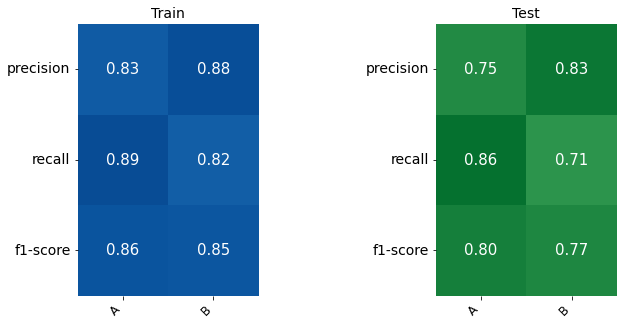

In [8]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear)

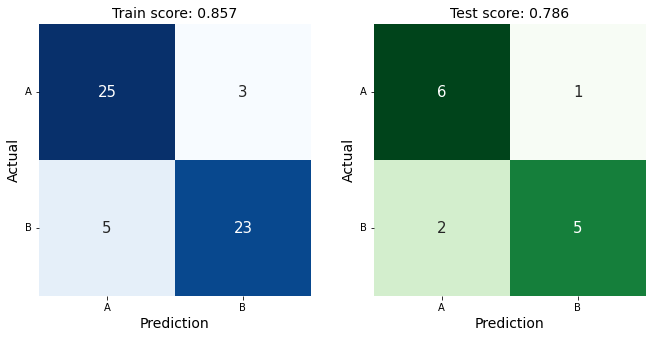

In [9]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_linear)

# RBF SVM Model Evaluation

In [10]:
print(model_svm_rbf.best_params_)
print(model_svm_rbf.score(X_train, y_train), model_svm_rbf.best_score_, model_svm_rbf.score(X_test, y_test))

{'algo__C': 1.0, 'algo__gamma': 1.0}
0.9642857142857143 0.8035714285714286 0.7142857142857143


In [11]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf, report=True)

Train report
              precision    recall  f1-score   support

           A       1.00      0.93      0.96        28
           B       0.93      1.00      0.97        28

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56


Test report
              precision    recall  f1-score   support

           A       0.71      0.71      0.71         7
           B       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



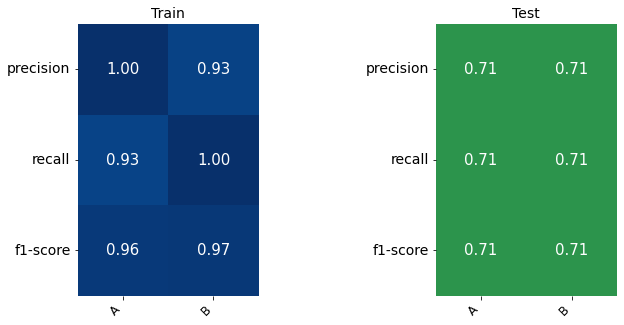

In [12]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf)

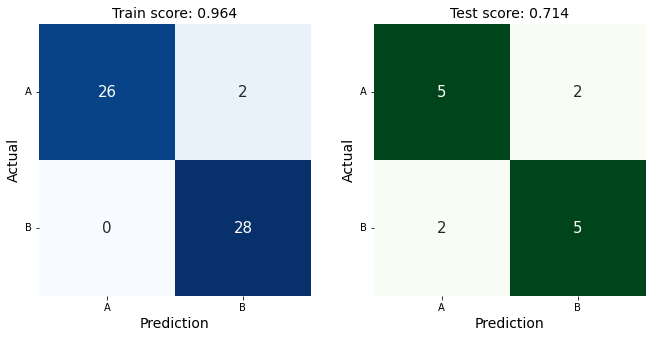

In [13]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_rbf)

# Save Model

In [14]:
import pickle
import os
file_path = "../model"
os.makedirs(file_path, exist_ok=True)
pickle.dump(model_svm_linear, open(f"{file_path}/svm_linear_3w.pkl", "wb"))
pickle.dump(model_svm_rbf, open(f"{file_path}/svm_rbf_3w.pkl", "wb"))